# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** Jan Niezabitowski

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [23]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


**Wnioski**

Zaimplementowano funkcje generujące węzły Czebyszewa drugiego rodzaju oraz wagi barycentryczne. Węzły te zagęszczają się na krańcach przedziału $[-1, 1]$, aby  zminimalizować błąd interpolacji i uniknąć efektu Rungego, typowego dla węzłów równoodległych. Implementacja wag jest niezbędna dla stabilności drugiego wzoru barycentrycznego.

---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [24]:
# ===== Twoja implementacja tutaj =====
f_1 = lambda x: np.sign(x)*x + x ** 2
f_2 = lambda x: np.sign(x) * (x ** 2)
f_3 = lambda x: (np.abs(np.sin(5*x))) ** 3
f_4 = lambda x: 1 / (1 + x ** 2)
f_5 = lambda x: 1 / (1 + 25 * (x ** 2))
f_6 = lambda x: 1 / (1 + 100 * (x ** 2))
f_7 = lambda x: np.sign(x)

func = [f_1, f_2, f_3, f_4, f_5, f_6, f_7]

**Wnioski**

Zdefiniowano zestaw funkcji o różnych właściwościach. Taki dobór funkcji pozwala na przetestowanie metody interpolacji dla różnych przypadków.

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


**Wnioski**

Zaimplementowano funkcję obliczającą normę, czyli maksymalny błąd bezwzględny. Jest to  miara oceny jakości aproksymacji, która gwarantuje, że odchylenie interpolacji od funkcji rzeczywistej w żadnym punkcie nie przekracza wyznaczonej wartości.

---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


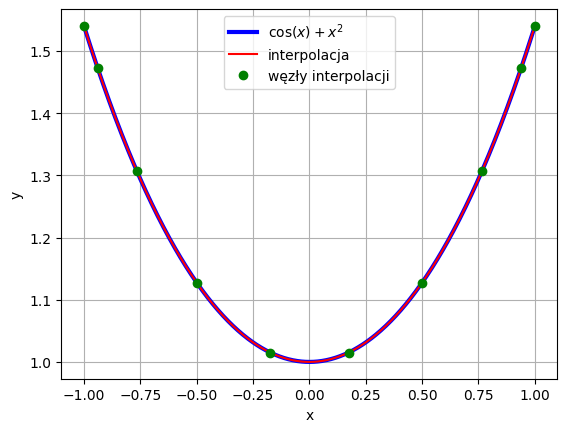

In [25]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

269 μs ± 47 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
22.4 ms ± 2.49 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


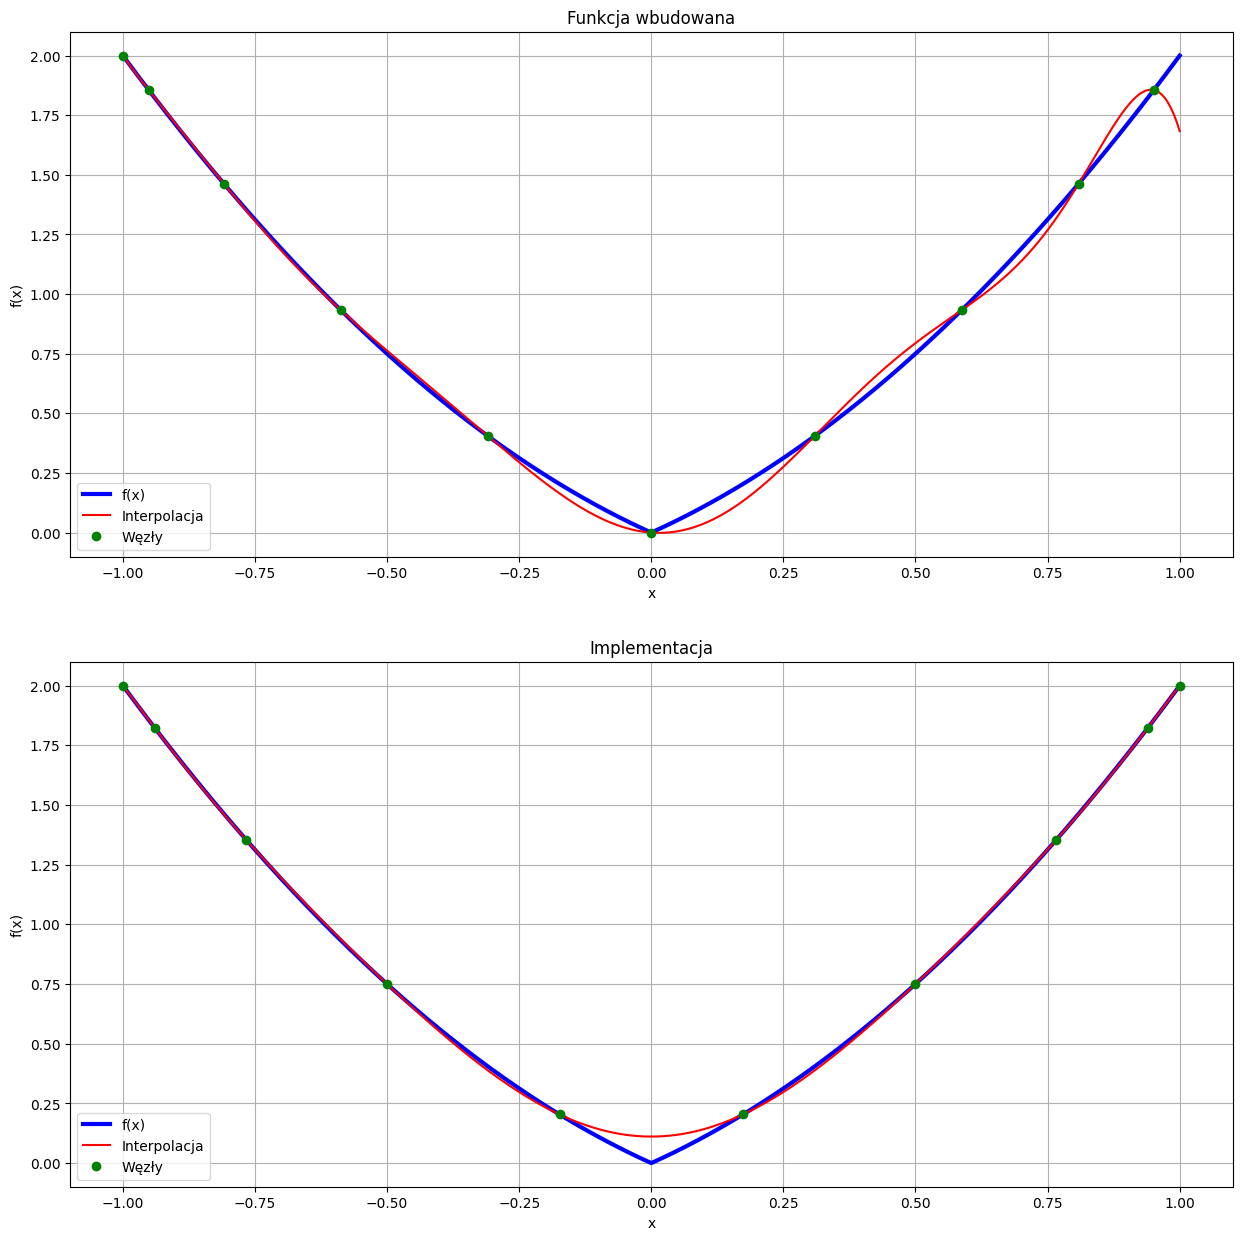

1.07 ms ± 60.6 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
28.9 ms ± 4.05 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


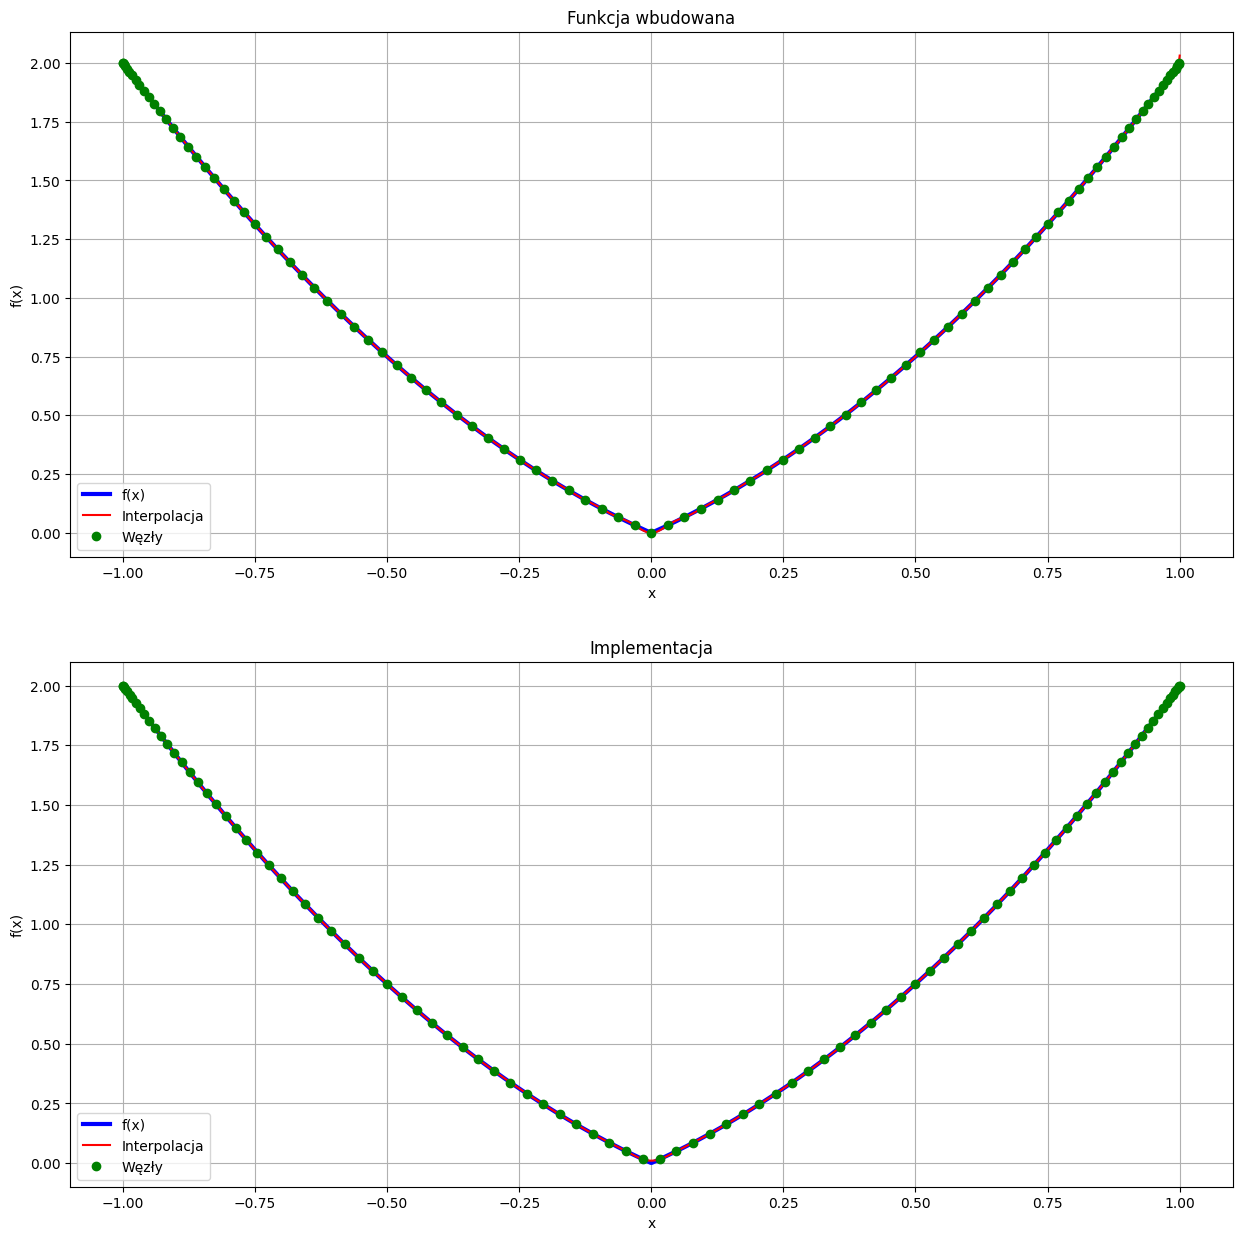

18.2 ms ± 2.27 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
25.7 ms ± 291 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)


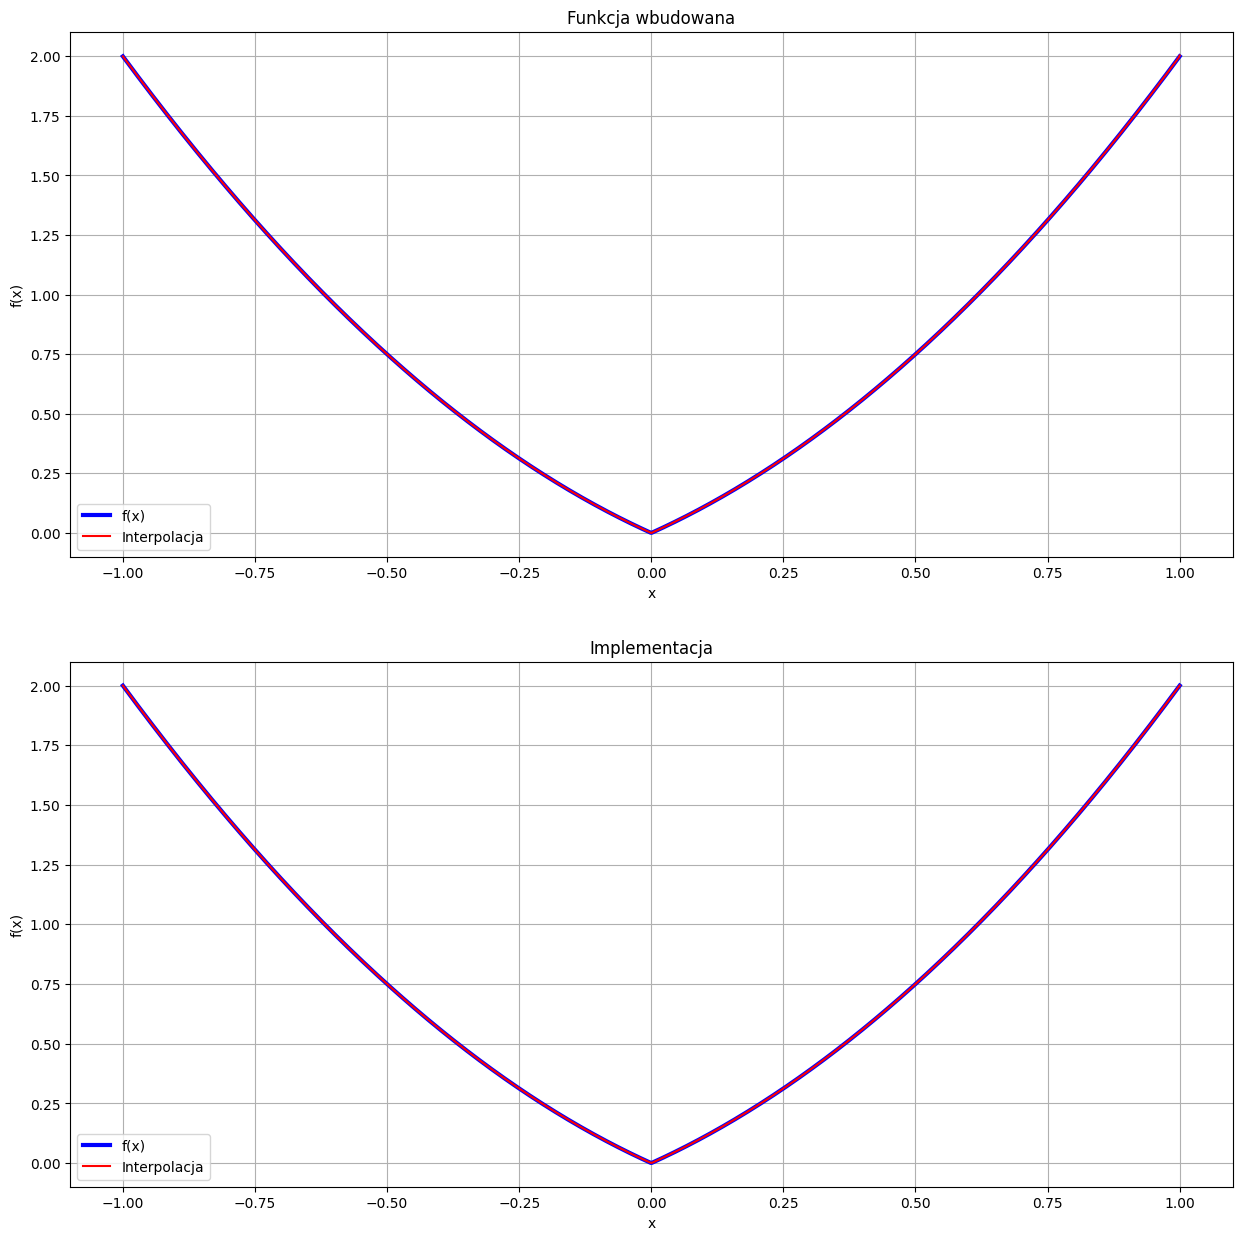

360 ms ± 8.33 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
49.4 ms ± 2.71 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


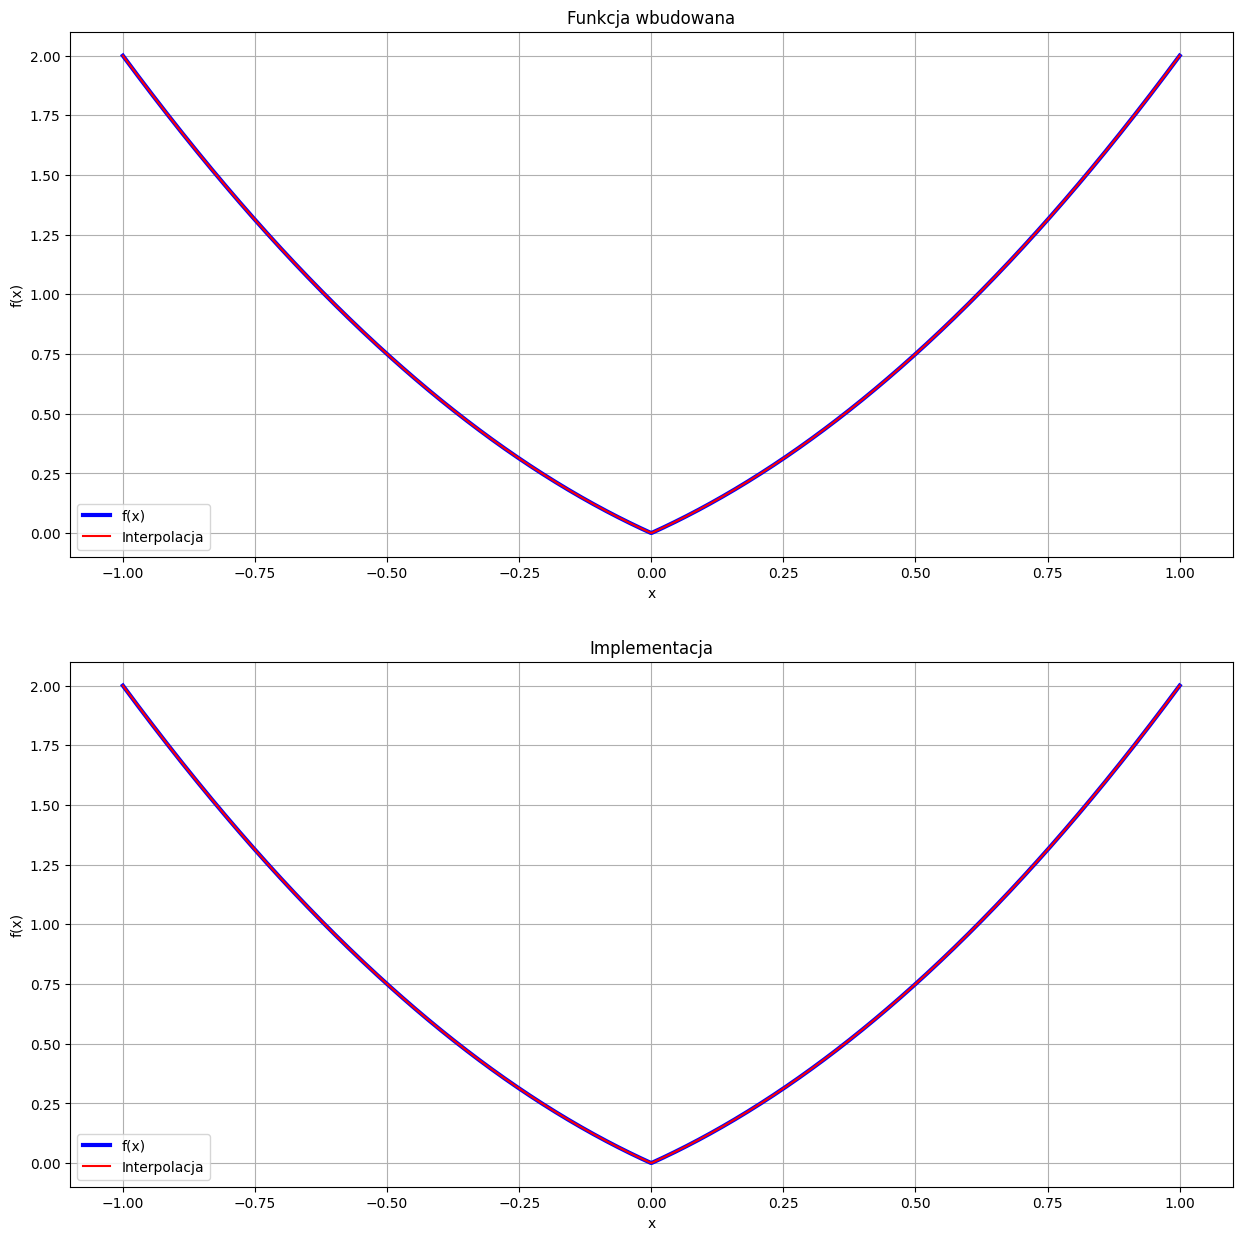

385 ms ± 7.08 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)


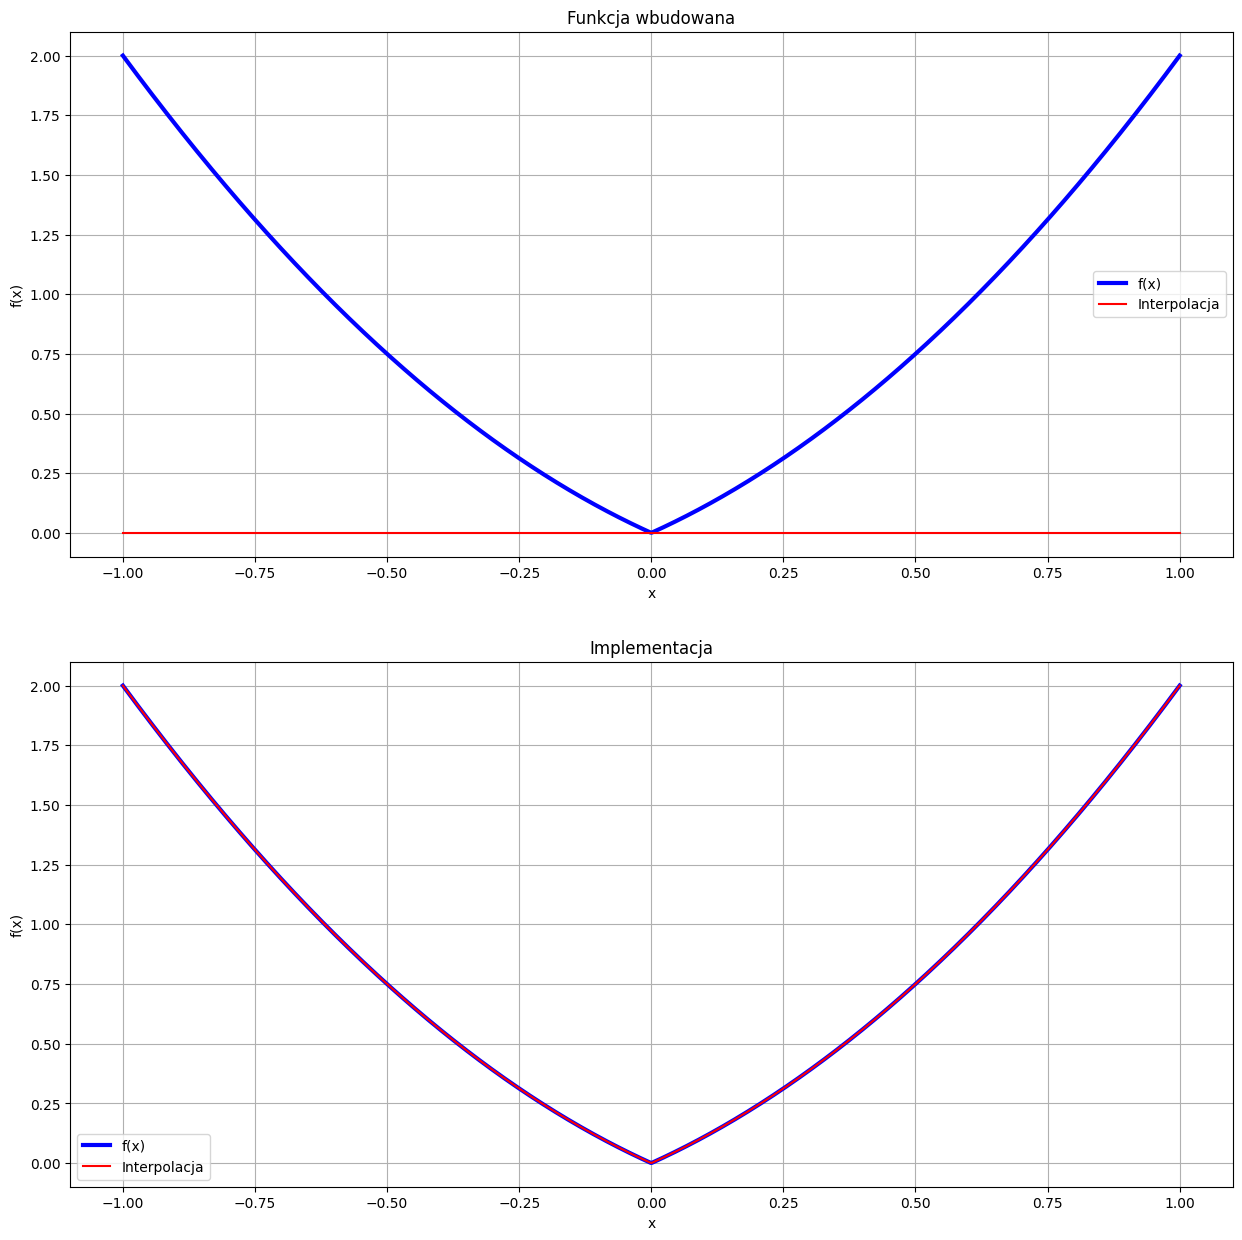

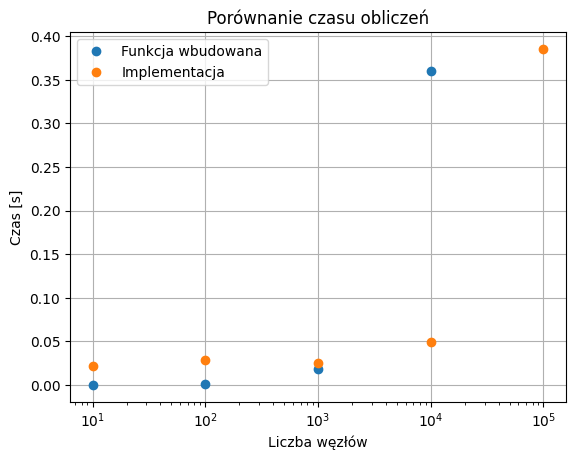

In [26]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
n_list = [10**1, 10**2, 10**3, 10**4, 10**5]
builtin_t = []
imp_t = []

for n in n_list:
    x_ch = np.cos(np.linspace(1, n, n) * (np.pi / n))
    
    if n < 20000:
        y_sp = sp.interpolate.barycentric_interpolate(x_ch, f_1(x_ch), x)
        time = %timeit -r 5 -n 10 -o sp.interpolate.barycentric_interpolate(x_ch, f_1(x_ch), x)
        builtin_t.append(time.average)
    else:
        y_sp = np.zeros((len(x), 1))
        builtin_t.append(np.inf)
    
    cheb_n = main.chebyshev_nodes(n)
    cheb_w = main.bar_cheb_weights(n)
    y_imp = main.barycentric_inte(cheb_n, f_1(cheb_n), cheb_w, x)
    time = %timeit -r 5 -n 10 -o main.barycentric_inte(cheb_n, f_1(cheb_n), cheb_w, x)
    imp_t.append(time.average)
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))
    
    ax[0].plot(x, f_1(x), 'b', linewidth=3, label='f(x)')
    ax[0].plot(x, y_sp, 'r', label='Interpolacja')
    if n < 150:
        ax[0].plot(x_ch, f_1(x_ch), 'go', label='Węzły')
    ax[0].set_title('Funkcja wbudowana')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('f(x)')
    ax[0].grid()
    ax[0].legend()

    ax[1].plot(x, f_1(x), 'b', linewidth=3, label='f(x)')
    ax[1].plot(x, y_imp, 'r', label='Interpolacja')
    if n < 150:
        ax[1].plot(cheb_n, f_1(cheb_n), 'go', label='Węzły')

    ax[1].set_title('Implementacja')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('f(x)')
    ax[1].grid()
    ax[1].legend()
    
    plt.show()

plt.subplots()
plt.semilogx(n_list, builtin_t, 'o', label='Funkcja wbudowana')
plt.semilogx(n_list, imp_t, 'o', label='Implementacja')
plt.title('Porównanie czasu obliczeń')
plt.xlabel('Liczba węzłów')
plt.ylabel('Czas [s]')
plt.grid()
plt.legend()

**Wnioski**

Przeprowadzono interpolację funkcji ciągłej nieróżniczkowalnej $f_1$. Wyniki pokazują, że wraz ze wzrostem liczby węzłów błąd maleje, co potwierdza zbieżność metody dla węzłów Czebyszewa. Stworzona implementacja metody barycentrycznej okazała się efektywna czasowo, ze złożonością porównywalną z funkcją SciPy.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

Błąd dla 10 węzłów: 0.005304586608122622.

Błąd dla 100 węzłów: 4.557426970365193e-05.

Błąd dla 1000 węzłów: 1.2400741297158291e-05.

Błąd dla 10000 węzłów: 1.7644288942686437e-05.

Błąd dla 100000 węzłów: 1.8996840267737625e-05.

Błąd dla 1000000 węzłów: 1.981415609719761e-05.

Błąd dla 10 węzłów: 0.5662005213236176.

Błąd dla 100 węzłów: 0.00033440016167092767.

Błąd dla 1000 węzłów: 1.8647176550978806e-05.

Błąd dla 10000 węzłów: 3.2533642923326944e-05.

Błąd dla 100000 węzłów: 4.728395700825949e-05.

Błąd dla 1000000 węzłów: 4.656072829745117e-05.



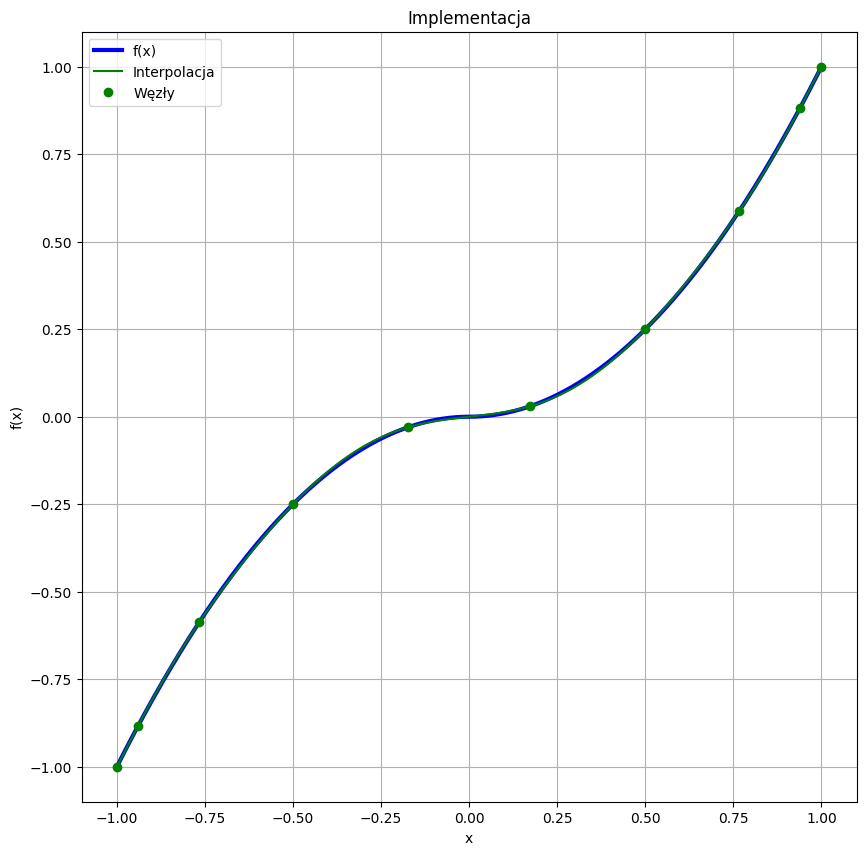

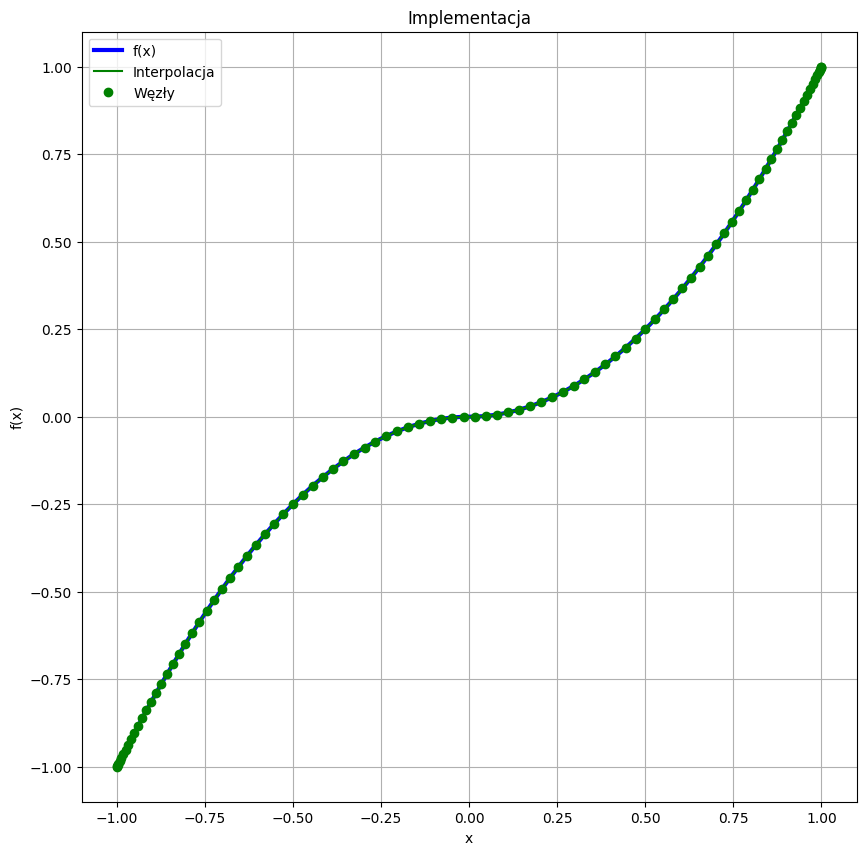

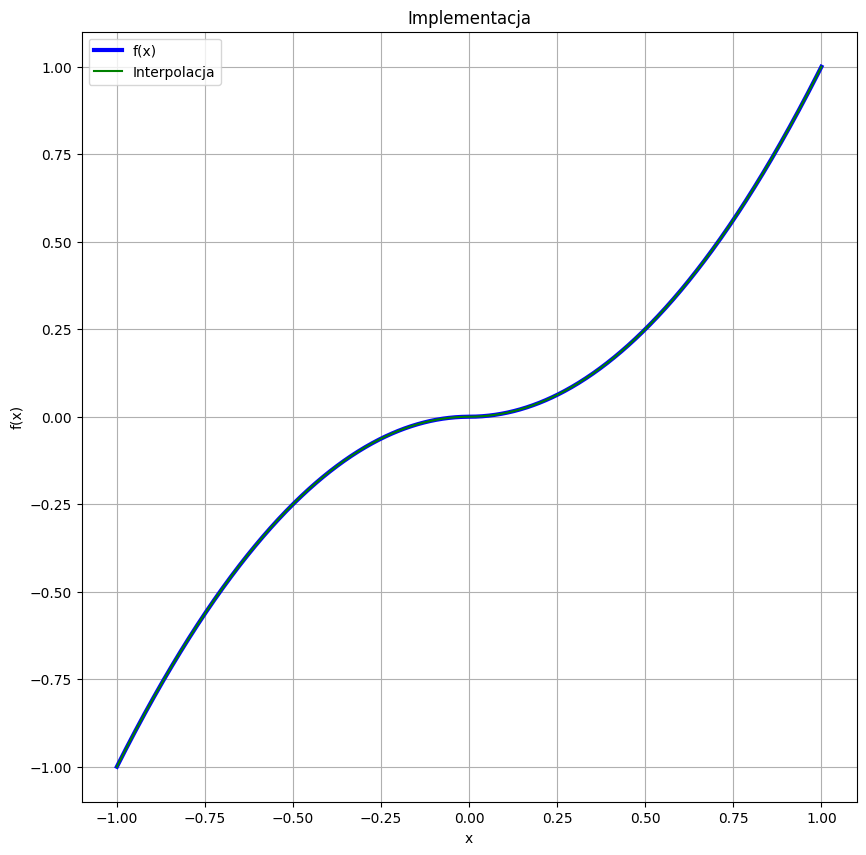

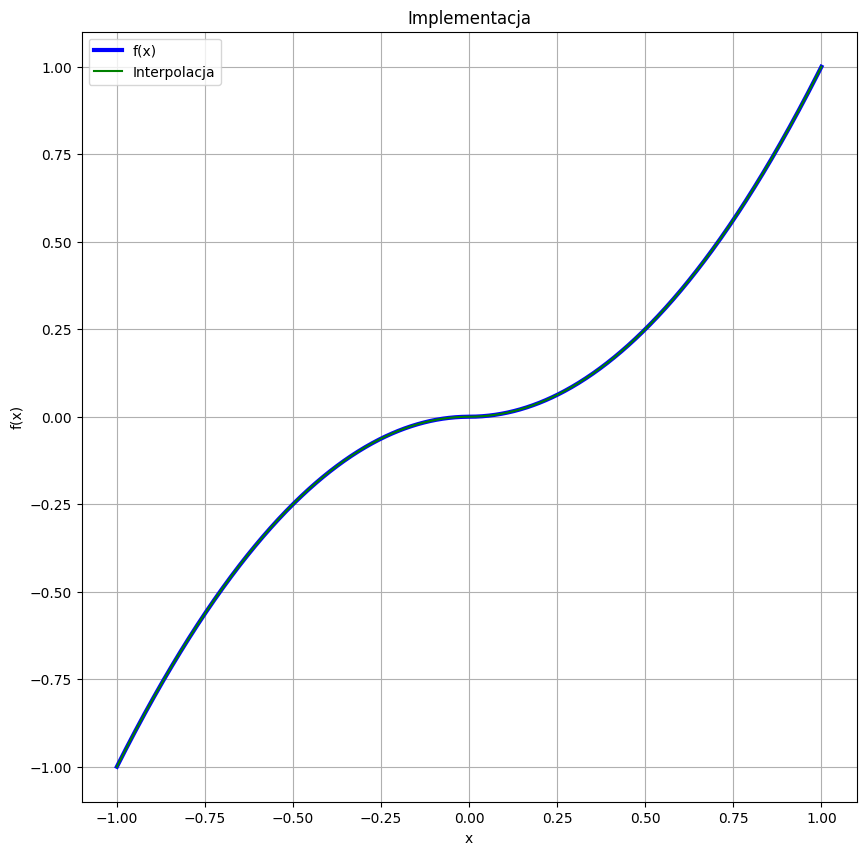

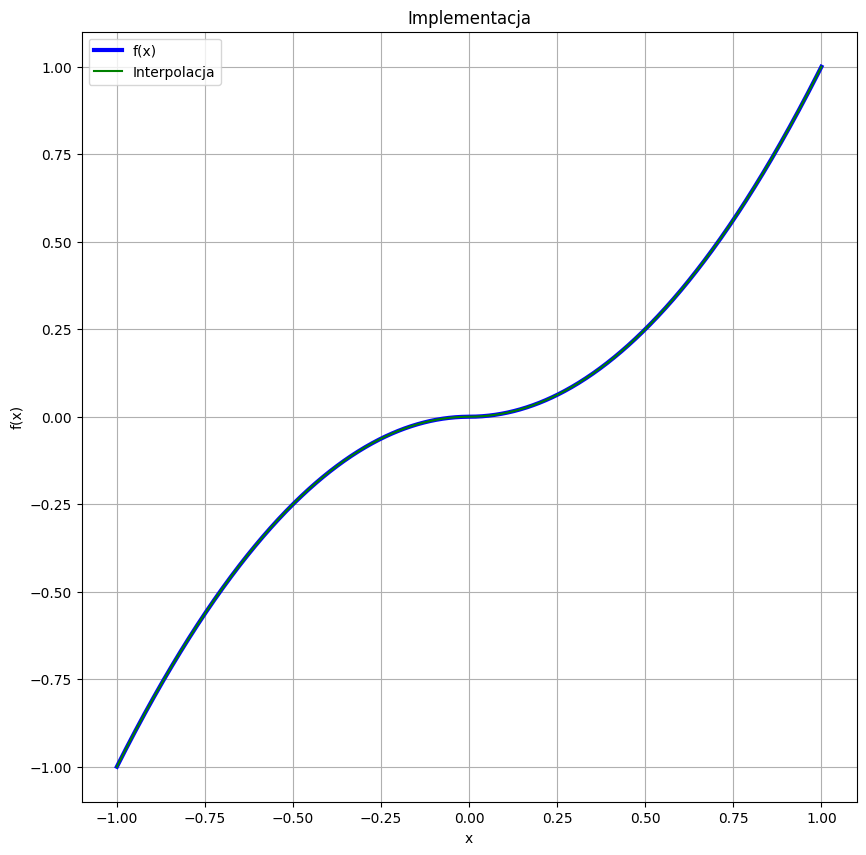

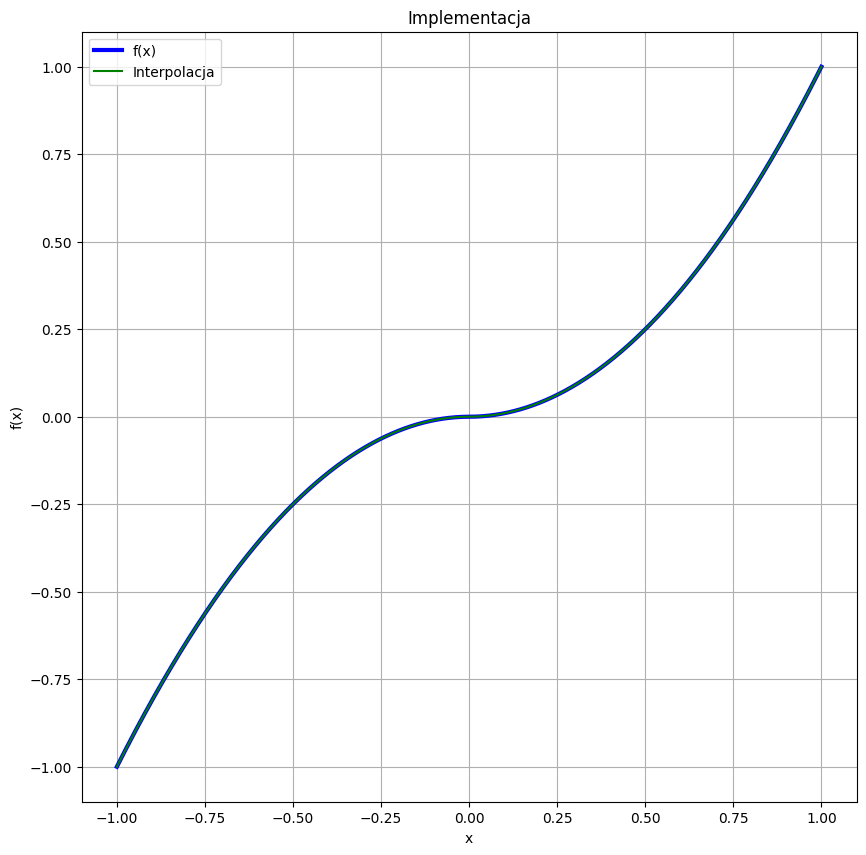

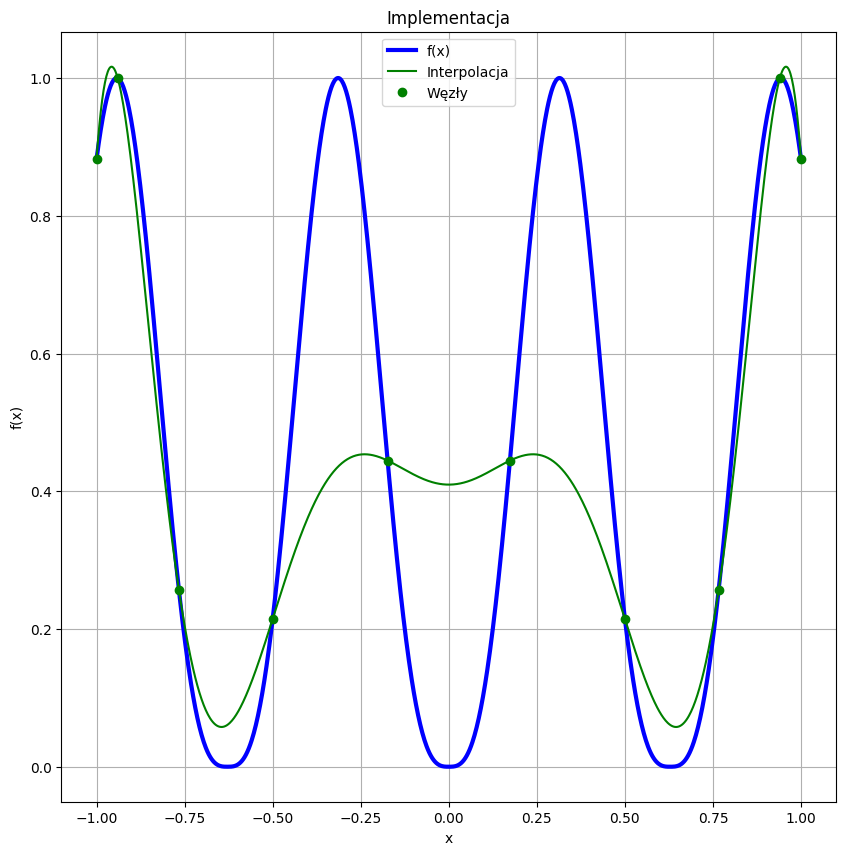

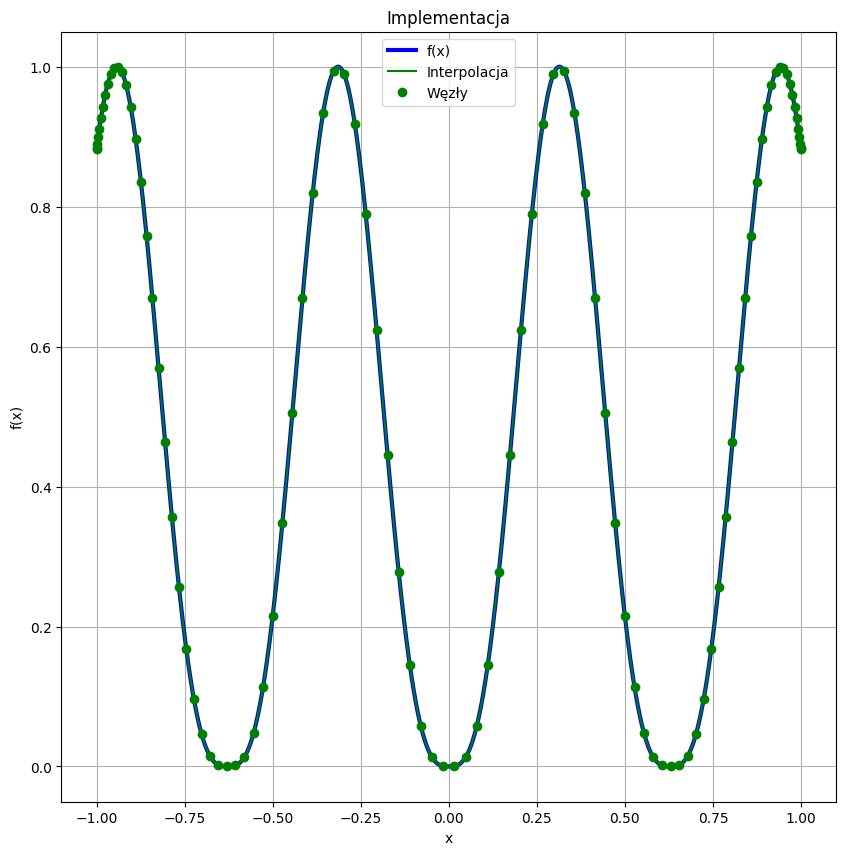

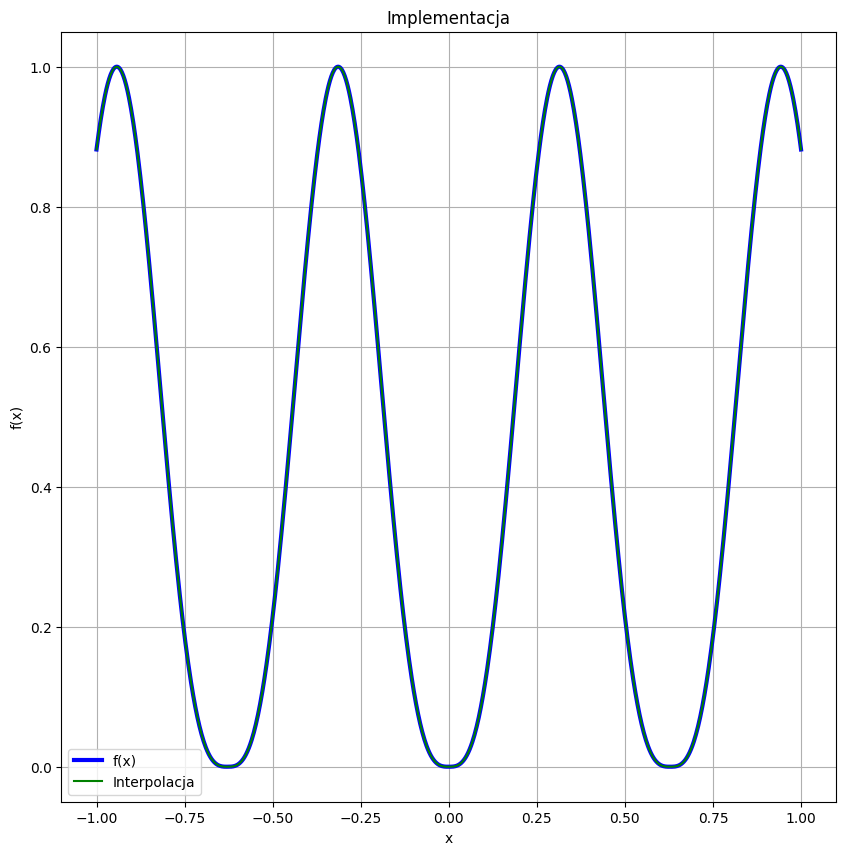

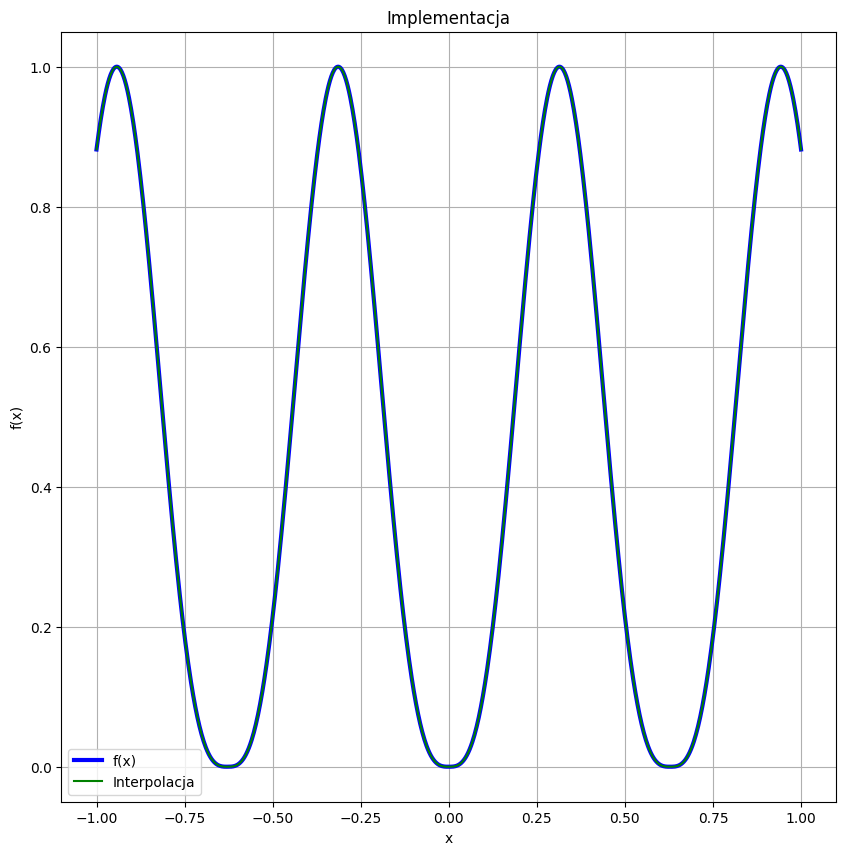

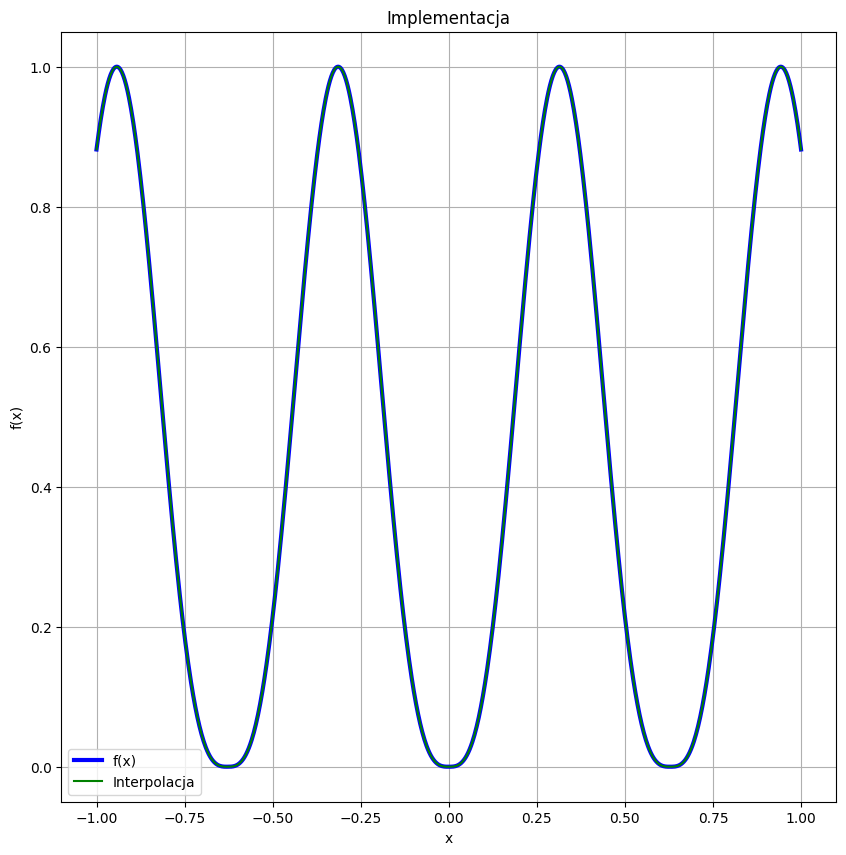

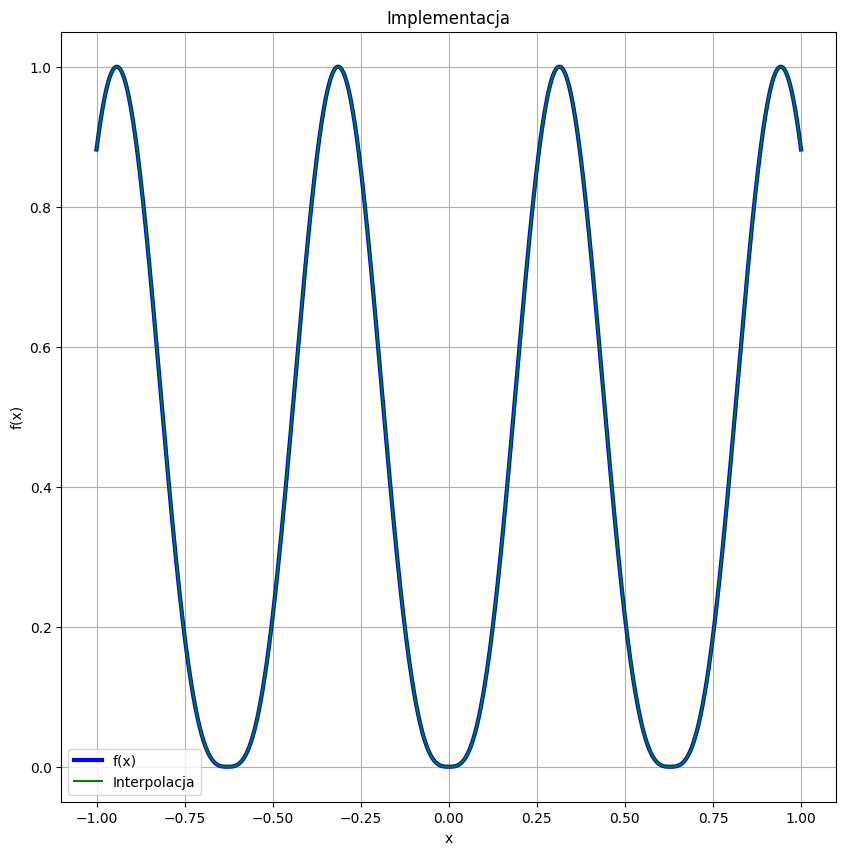

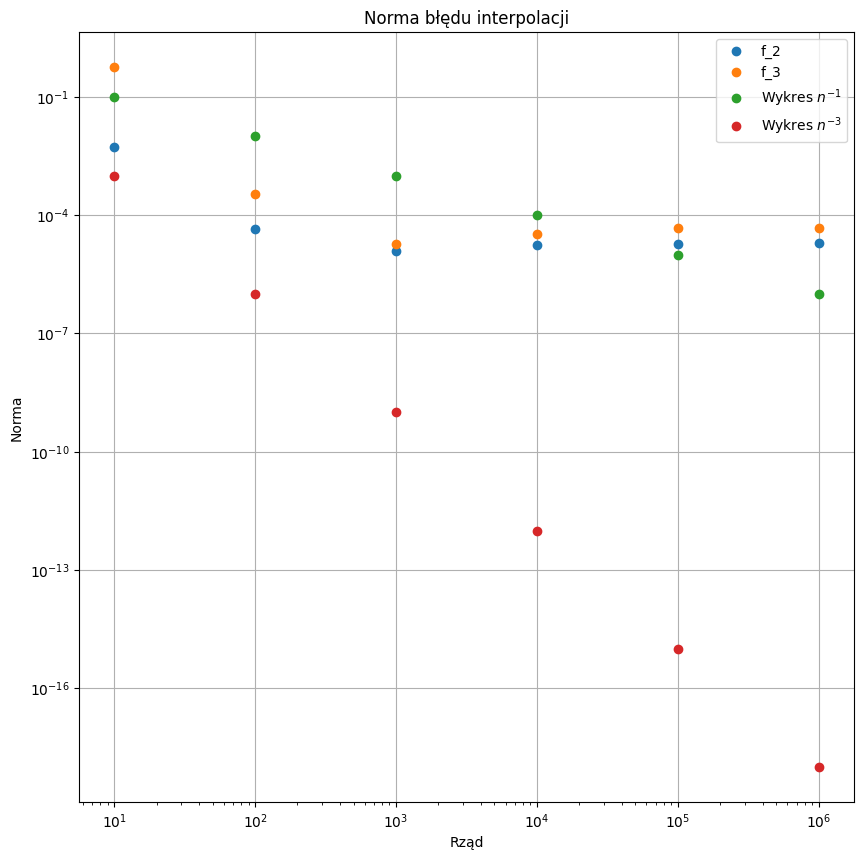

In [27]:
# ===== Twoja implementacja tutaj =====
e = np.finfo(np.float64).eps
max_nodes = 1000000
x = np.linspace(-1,1,1000)

nodes_2 = [10]
norm_2 = []
above_e = True

while above_e:
    nodes_number = nodes_2[-1]

    cheb_n = main.chebyshev_nodes(nodes_number)
    cheb_w = main.bar_cheb_weights(nodes_number)
    y_imp = main.barycentric_inte(cheb_n, f_2(cheb_n), cheb_w, x)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x, f_2(x), 'b', linewidth=3, label='f(x)')
    ax.plot(x, y_imp, 'g', label='Interpolacja')

    if nodes_number < 150:
        ax.plot(cheb_n, f_2(cheb_n), 'go', label='Węzły')

    ax.set(title='Implementacja',xlabel='x', ylabel='f(x)')
    ax.grid()
    ax.legend()

    norm = main.L_inf(f_2(x)[1:-2], y_imp[1:-2])
    
    print(f'Błąd dla {nodes_number} węzłów: {norm}.\n')
    norm_2.append(norm)

    if norm >= e and nodes_number < max_nodes:
        nodes_2.append(nodes_number * 10)
        above_e = True
    else: 
        above_e = False

nodes_3 = [10]
norm_3 = []
above_e = True

while above_e:
    nodes_number = nodes_3[-1]

    cheb_n = main.chebyshev_nodes(nodes_number)
    cheb_w = main.bar_cheb_weights(nodes_number)
    y_imp = main.barycentric_inte(cheb_n, f_3(cheb_n), cheb_w, x)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x, f_3(x), 'b', linewidth=3, label='f(x)')
    ax.plot(x, y_imp, 'g', label='Interpolacja')

    if nodes_number < 150:
        ax.plot(cheb_n, f_3(cheb_n), 'go', label='Węzły')

    ax.set(title='Implementacja',xlabel='x', ylabel='f(x)')
    ax.grid()
    ax.legend()
    norm = main.L_inf(f_3(x)[1:-2], y_imp[1:-2])

    print(f'Błąd dla {nodes_number} węzłów: {norm}.\n')
    norm_3.append(norm)

    if norm >= e and nodes_number < max_nodes:
        nodes_3.append(nodes_number * 10)
        above_e = True
    else: 
        above_e = False

v_1 = [n ** -1 for n in nodes_2]
v_3 = [n ** -3 for n in nodes_3]
fig, ax = plt.subplots(figsize=(10,10))

ax.loglog(nodes_2, norm_2, 'o', label='f_2')
ax.loglog(nodes_3, norm_3, 'o', label='f_3')
ax.loglog(nodes_2, v_1, 'o', label='Wykres $n^{-1}$')
ax.loglog(nodes_3, v_3, 'o', label='Wykres $n^{-3}$')

ax.set(title='Norma błędu interpolacji', xlabel='Rząd', ylabel='Norma')

ax.legend()
ax.grid()

**Wnioski**

Analiza funkcji $f_2$ i $f_3$ potwierdziła twierdzenia teoretyczne Jacksona. Na wykresach w skali logarytmicznej widać, że szybkość spadku błędu zależy od gładkości funkcji: dla funkcji gładszej ($f_3$) błąd maleje znacznie szybciej niż dla funkcji mniej gładkiej ($f_2$).

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

Nieparzyste: [ 0.99999508  0.9999803   0.99995568 ... -0.9999803  -0.99999508
 -1.        ].

Parzyste: [ 9.99995065e-01  9.99980261e-01  9.99955587e-01  9.99921044e-01
  9.99876632e-01  9.99822352e-01  9.99758204e-01  9.99684189e-01
  9.99600308e-01  9.99506560e-01  9.99402948e-01  9.99289473e-01
  9.99166134e-01  9.99032935e-01  9.98889875e-01  9.98736957e-01
  9.98574181e-01  9.98401550e-01  9.98219065e-01  9.98026728e-01
  9.97824541e-01  9.97612506e-01  9.97390625e-01  9.97158900e-01
  9.96917334e-01  9.96665928e-01  9.96404686e-01  9.96133609e-01
  9.95852701e-01  9.95561965e-01  9.95261402e-01  9.94951017e-01
  9.94630812e-01  9.94300790e-01  9.93960955e-01  9.93611311e-01
  9.93251859e-01  9.92882605e-01  9.92503551e-01  9.92114701e-01
  9.91716060e-01  9.91307631e-01  9.90889418e-01  9.90461426e-01
  9.90023658e-01  9.89576119e-01  9.89118813e-01  9.88651745e-01
  9.88174919e-01  9.87688341e-01  9.87192014e-01  9.86685944e-01
  9.86170136e-01  9.85644595e-01  9.85109326e-01  9

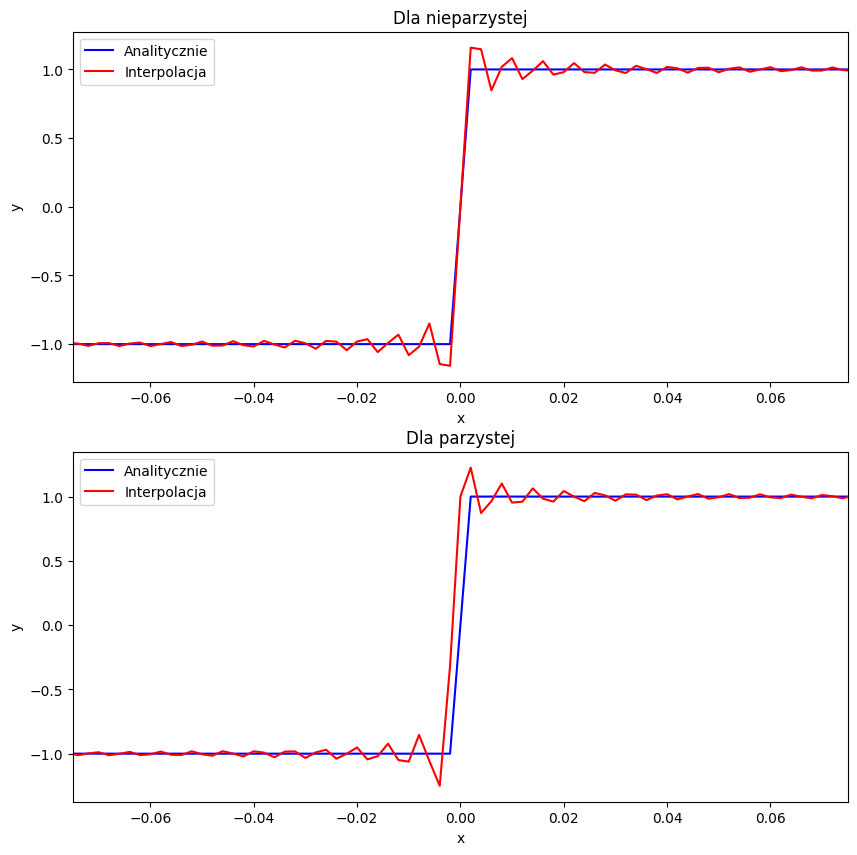

In [28]:
# ===== Twoja implementacja tutaj =====
nodes_number = 1000
x = np.linspace(-1, 1, 1001)

odd_n = np.cos(np.linspace(1, nodes_number + 1, nodes_number + 1) * np.pi / (nodes_number + 1))
even_n = np.cos(np.linspace(1, nodes_number, nodes_number) * np.pi / nodes_number)

y = f_7(x)
y_odd = sp.interpolate.barycentric_interpolate(odd_n, f_7(odd_n), x)
y_even = sp.interpolate.barycentric_interpolate(even_n, f_7(even_n), x)

print(f'Nieparzyste: {odd_n}.\n')
print(f'Parzyste: {even_n}.\n')

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(x, y, 'b', label='Analitycznie')
ax[0].plot(x, y_odd, 'r', label='Interpolacja')

ax[0].set(title='Dla nieparzystej', xlabel='x', ylabel='y')

ax[0].legend()
ax[0].set_xlim(-0.075, 0.075)

ax[1].plot(x, y, 'b', label='Analitycznie')
ax[1].plot(x, y_even, 'r', label='Interpolacja')

ax[1].set(title='Dla parzystej',
xlabel='x', ylabel='y')

ax[1].legend()
ax[1].set_xlim(-0.075, 0.075)

err_odd = main.L_inf(y[1:-1], y_odd[1:-1])
err_even = main.L_inf(y[1:-1], y_even[1:-1])
print(f'Błąd (nieparzysta): {err_odd}')
print(f'Błąd (parzysta): {err_even}')

**Wnioski**

Badanie funkcji analitycznych ($f_4$) oraz nieciągłej ($f_5$) pokazało ograniczenia interpolacji wielomianowej. Dla funkcji analitycznych zbieżność jest geometryczna, ale zależy od bliskości biegunów w dziedzinie zespolonej (parametr $a$). Dla funkcji nieciągłej ($f_5$) występuje efekt Gibbsa, błąd w normie nie maleje do zera mimo zwiększania liczby węzłów, a oscylacje przy skoku funkcji utrzymują się.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)